In [ ]:
import xarray as xr
import itertools
import time
import numpy as np
import metview as mv

import os
os.environ['PROJ_LIB'] = "/opt/conda/envs/geospatial/share/proj"

xr.set_options(keep_attrs=True)

<span style="color:#336699; font-size:24px;font-weight: bold;">hands on - WMO - World Meteorological Organization </span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Alex de Almeida Fernandes - <a href="mailto:alex.fernandes@inpe.br">alex.fernandes@inpe.br</a><br/>
        Felipe Odorizi de Mello - <a href="mailto:felipe.odorizi@inpe.br">felipe.odorizi@inpe.br</a><br/><br/>
    DIPTC – Weather and Climate Forecast Division
    <br/>
    CGCT – General Coordination of Earth Sciences
    <br/>
    INPE – National Institute for Space Research
    <br/>
    Brazil
    <br/><br/>
    Last Updated: November 11, 2025
</div>


<br/>

<div style="text-align: center;font-size: 18px;">
<b>hands on - WMO - World Meteorological Organization </b></div>

<img src="https://data.inpe.br/wp-content/uploads/2025/07/logo-BIG-INPE.svg" align="right" width="100"/>

# <span style="color:#336699; font-size:24px;font-weight: bold;"> Georeferenced Information Database</span>
<hr style="border:2px solid #0077b9;">


<div style="display: flex;width: 100%;">
   <div style="width: 30%;">
         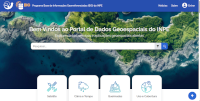
      </div>
      <div
        style="
          text-align: justify;
          width: 50%;
          padding: 10px;
          box-sizing: border-box;
        "
      >
        <p>
          <a href="https://data.inpe.br/">
           Georeferenced Information Database </a
          >(BIG - programa <b>B</b>ase de <b>I</b>nformações <b>G</b>eorreferenciadas)
          is a program by
          <b>INPE (National Institute for Space Research)</b> aimed at creating
          a high-performance computing platform to manage, integrate, process,
          and provide access to large volumes of geospatial data. It serves as
          an infrastructure for accessing and analyzing data from satellites and
          other environmental sources, with a focus on data science and cloud
          computing. The program uses modern protocols such as <b>STAC </b>to
          catalog and provide standardized access to the information.
        </p>
   </div>
</div>

<span style="color:#336699; font-size:24px;font-weight: bold;">BIG Tech Talks</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 20px;">
   <a href="https://www.youtube.com/playlist?list=PLdgPQKK41YJgLPUSxComMi0T1g8tLSj7C">BIG Tech Talks</a>
</div>
<br/>
<div style="text-align: center;font-size: 18px;">
<a href="https://github.com/brazil-data-cube/code-gallery/tree/master/jupyter/Python">Jupyter Notebooks</a></div>



# 🛰️ MERGE
<hr style="border:1px solid #0077b9;">

The `CPTEC/INPE MERGE product` is a precipitation dataset that combines rain gauge observations with satellite estimates ***(IMERG/GPM)***, resulting in a high spatial and temporal resolution grid over South America. It was developed to improve the representativeness of rainfall, especially in regions with low observation density.

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac.png?raw=true" align="right" width="66"/>

# STAC
<hr style="border:1px solid #0077b9;">

[**S**patio**T**emporal **A**sset **C**atalog (STAC)](https://stacspec.org/) organizes access to geospatial data, such as satellite imagery, using three main concepts:  `Collection`, `Item` and `Assets`.

- `Collection`: groups similar data, such as a set of images obtained from the same sensor or satellite over time, providing general information about the origin and characteristics of the data;

- `Item`: represents a specific data unit, such as images corresponding to an exact location or moment, including spatial, temporal, and spectral metadata;

- `Asset`: refers to the files associated with an Item, which may include different formats, resolutions, variables, auxiliary data, among other aspects.

The standard streamlines access to these files in a consistent way, making it an efficient choice for cataloging and enabling interoperability across various systems. It also supports optimized spatiotemporal queries. Finally, at the highest level, the `Catalog` concept groups multiple `Collections`. The diagram shown in the image below illustrates the concepts of the STAC data model:

<center>
<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-concept.png" width="480">
</center>

## 👩🏽‍💻 STAC Client API
<hr style="border:1px solid #0077b9;">

To run the example in this Jupyter Notebook, the package will be installed. [pystac-client](https://pystac-client.readthedocs.io/en/latest/).

In [ ]:
# Não necessário no ambiente do BDC-Lab
#!pip install pystac-client

To use its features, import the package `pystac_client`.

In [ ]:
import pystac_client
pystac_client.__version__

Then, connect to the STAC BDC/BIG service.

In [ ]:
service = pystac_client.Client.open('https://data.inpe.br/bdc/stac/v1/')

## 🔍 Retrieving GRIB2 files from January 1 to January 31, 2025.
<hr style="border:1px solid #0077b9;">

Using the STAC service and the `search`method, we will retrieve `Items` from the `prec_merge_daily-1`collection. We will use the `datetime` parameter to **restrict the temporal range of interest**: `2025-01-01/2025-01-31`.

In [ ]:
item_search = service.search(datetime='2025-01-01/2025-01-31',
                             collections=['prec_merge_daily-1'])

# Create tmp folder or remove existing mars files
tmp_folder = "Dados/tmp/"
if not os.path.exists(tmp_folder):
    os.makedirs(tmp_folder)
else:
    for file in os.listdir(tmp_folder):
        path = os.path.join(tmp_folder, file)
        if os.path.isfile(path):
            os.remove(path)
        elif os.path.isdir(path):
            os.rmdir(path)

ds = mv.Fieldset()
for i in item_search.items():
    url = i.assets['merge_daily'].href
    time.sleep(0.1)
    print(i.properties['datetime'], '->', url)
    ds.append(mv.download (url=url, target=tmp_folder))


In [ ]:
item_search.matched()

In [ ]:
ds.describe()

<img src="https://metview.readthedocs.io/en/5.23.0/_static/metview.png" align="right" width="70"/>

# <span style="color:#336699; font-size:24px;font-weight: bold;"> Metview</span>
<hr style="border:2px solid #0077b9;">
<img alt="_images/metview-all-in-one.png" src="https://metview.readthedocs.io/en/5.23.0/_images/metview-all-in-one.png" style="width: 300px;" />
<p><strong>Metview</strong> is a meteorological workstation application designed to be a complete working environment
for both the operational and research meteorologist. Its capabilities include powerful data access,
processing and visualisation. It features both a powerful <strong>icon-based user interface</strong> for
interactive work and a <strong>Python</strong> interface for batch processing.</p>
<p>Metview was developed as part of a cooperation between ECMWF and INPE (Brazilian National Institute for Space Research).</p>
<a  href="https://metview.readthedocs.io/en/latest/" title="Metview">documentation</a>

Import the package  `metview` to enable its functionality

In [ ]:
#import metview as mv

<div style="display: flex; flex-direction: column; align-items: center; gap: 16px;">
  <img src="https://metview.readthedocs.io/en/5.23.0/_images/GEOVIEW.png" alt="GEOVIEW" style="max-width: 100%; height: auto;">
  <span style="color:#000000; font-size:18px; padding:10px;">geoview - Defines a geographical view
  <a href="https://metview.readthedocs.io/en/5.23.0/gen_files/icon_functions/geoview.html">(details)</a>
  </span>
</div>
<hr style="border:1px solid #0077b9;">



In [ ]:
area = [-60,-120,20,0] # S,W,N,E
AMS = mv.geoview(
    map_area_definition = "corners",
    area                = area,
    coastlines = mv.mcoast(
        map_coastline_land_shade        = "on",
        map_coastline_land_shade_colour = "#eeeeee",
        map_grid_latitude_increment     = 10,
        map_grid_longitude_increment    = 10)
    )

auto_style = mv.mcont(contour_automatic_setting = "ecmwf")

<div style="display: flex; flex-direction: column; align-items: center;">
  <img src="https://metview.readthedocs.io/en/5.23.0/_images/MCONT.png" alt="MCONT">
  <span style="color:#000000; font-size:18px; padding: 10px;">mcont - This is the visual definition for specifying how gridded data is displayed
  <a href="https://metview.readthedocs.io/en/5.23.0/gen_files/icon_functions/mcont.html">(details)</a>
  </span>
</div>
<hr style="border:1px solid #0077b9;">


In [ ]:
shaded = mv.mcont(
    legend                       = "on",
    contour_highlight            = "off",
    contour_level_selection_type = "level_list",
    contour_level_list           = [2.5, 5, 10, 15, 35, 50, 75, 100, 125, 150, 200, 300],
    contour_label                = "off",
    contour_shade                = "on",
    contour_shade_method         = "area_fill",
    contour_line_colour_rainbow_direction = "clockwise",
    contour_line_colour_rainbow  = "on"
    )

In [ ]:
mv.setoutput("jupyter")

<span style="color:#000000; font-size:20px; padding: 12px;">plot - Generates a plot using the specified output device.
  <a href="https://metview.readthedocs.io/en/5.23.0/api/functions/plot.html">(details)</a>
</span>
<hr style="border:1px solid #0077b9;">


In [ ]:
mv.plot(AMS, ds['rdp'], shaded)